# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Clean_Manual_DBSCAN_woFalseLabel_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())

## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,6,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,8,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,9,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(41124, 6)

<Axes: ylabel='Type 1'>

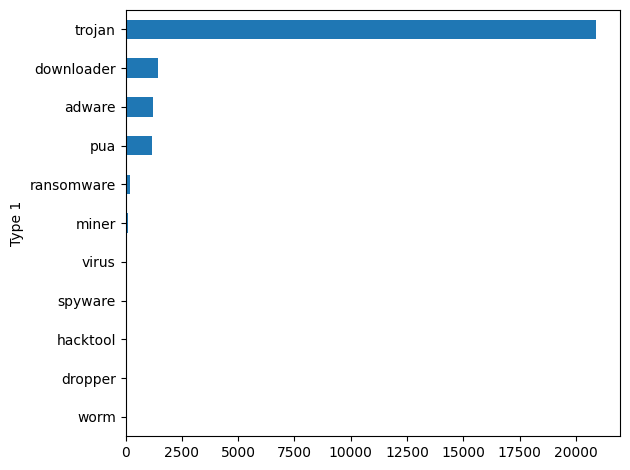

In [17]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [18]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#DROP ROWS THAT ARE FALSELLY LABELLED. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

how_many_clusters()

Number of Clusters: 11959
Number of single-item Clusters: 9923


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        20907
downloader     1430
adware         1211
pua            1179
ransomware      216
miner            88
virus            53
spyware          32
hacktool          7
dropper           3
worm              1
Name: count, dtype: int64

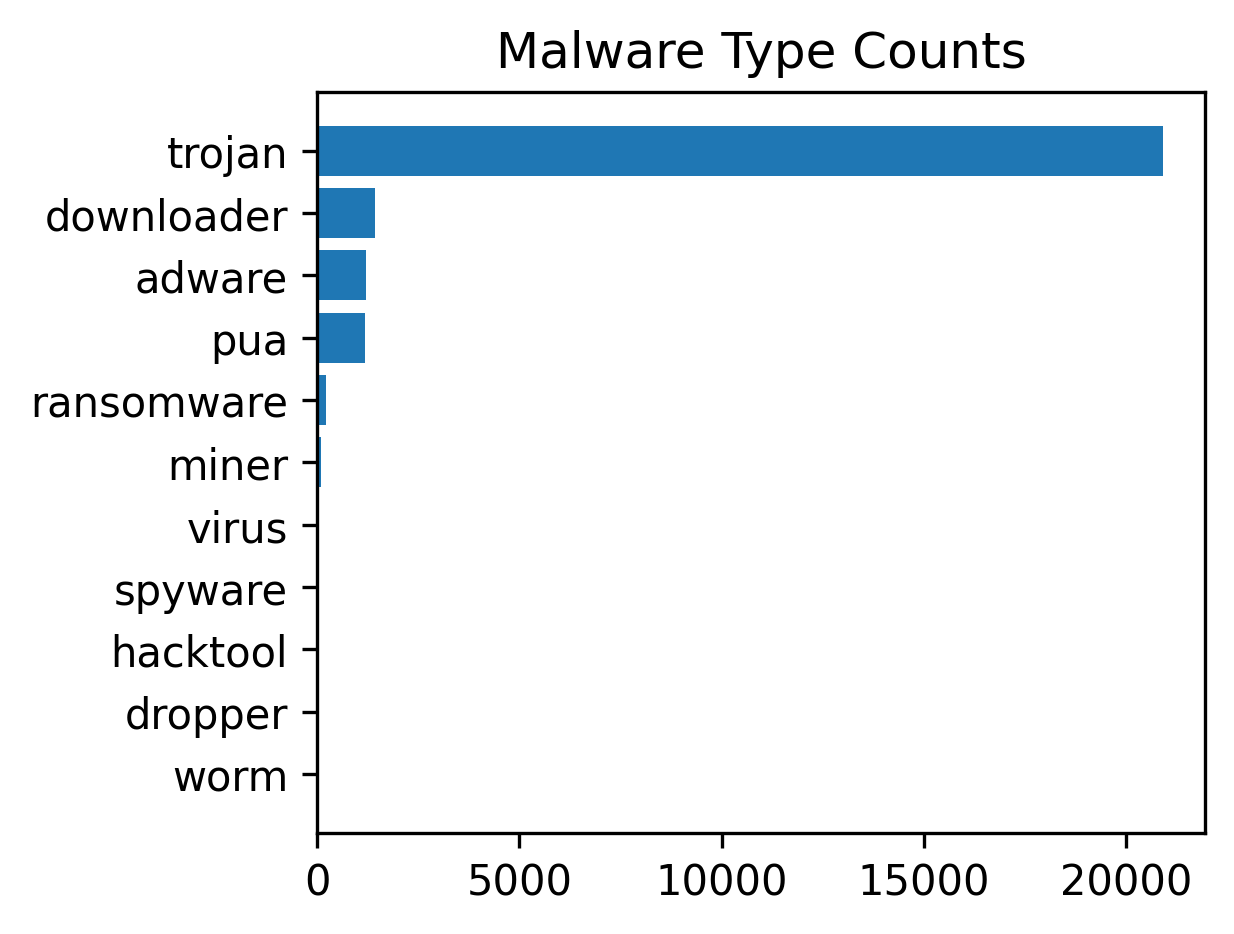

In [19]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## How many clusters are there?

In [20]:
how_many_clusters( )

Number of Clusters: 11959
Number of single-item Clusters: 9923


In [21]:
# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
malicious_df.head()

,cluster,hash,Type 1,Type 2,Type 3,pattern,type_pattern
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",trojan _ _
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory...",trojan _ _
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",adware _ _
12,12,1282837376a698e38af5cca54bdfbdd0,trojan,_,_,"GetSystemTimeAsFileTime,LdrGetDllHandle,LdrGet...",trojan _ _


In [22]:
how_many_clusters()

Number of Clusters: 10447
Number of single-item Clusters: 9923


## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [23]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 3: trojan (1); 
CLUSTER 4: trojan (1); 
CLUSTER 5: trojan (1); 
CLUSTER 7: adware (1); 
CLUSTER 12: trojan (1); 
CLUSTER 16: trojan (1); 
CLUSTER 20: trojan (1); 
CLUSTER 25: trojan (1); 
CLUSTER 28: pua (1); 
CLUSTER 30: trojan (1); 
CLUSTER 33: pua (1); 
CLUSTER 34: downloader (1); 
CLUSTER 35: trojan (1); 
CLUSTER 38: downloader (1); 
CLUSTER 46: trojan (1); 
CLUSTER 48: trojan (1); 
CLUSTER 50: trojan (1); 
CLUSTER 51: trojan (1); 
CLUSTER 59: trojan (1); 
CLUSTER 61: trojan (1); 
CLUSTER 64: 
CLUSTER 66: trojan (1); 
CLUSTER 70: trojan (1); 
CLUSTER 71: downloader (1); 
CLUSTER 75: trojan (1); 
CLUSTER 79: trojan (1); 
CLUSTER 82: trojan (3); 
CLUSTER 87: downloader (1); 
CLUSTER 96: pua (1); 
CLUSTER 106: downloader (1); 
CLUSTER 108: trojan (1); 
CLUSTER 109: trojan (1); 
CLUSTER 110: trojan (1); 
CLUSTER 111: trojan (1); 
CLUSTER 112: trojan (1); 
CLUSTER 114: trojan (1); 
CLUSTER 116: adware (1); 
CLUSTER 118: 
CLUSTER 119: trojan (1); 
CLUSTER 120: trojan (1); 
CLUSTE

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [24]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount_woNoise.csv", index=False)

# of Unique Malware Type: 12

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 5323
Matching Clusters: [3, 4, 5, 12, 16, 20, 25, 30, 35, 46, 48, 50, 51, 59, 61, 66, 70, 75, 79, 82, 108, 109, 110, 111, 112, 114, 119, 120, 123, 126, 128, 129, 130, 131, 136, 141, 145, 149, 150, 152, 153, 154, 158, 163, 164, 165, 167, 169, 170, 171, 172, 176, 178, 179, 184, 187, 191, 193, 197, 204, 205, 206, 210, 212, 215, 217, 218, 220, 226, 231, 236, 238, 239, 244, 245, 246, 249, 250, 252, 257, 259, 269, 270, 271, 272, 273, 275, 278, 279, 280, 281, 283, 285, 289, 291, 293, 297, 298, 299, 300, 302, 304, 305, 306, 308, 311, 313, 321, 326, 328, 329, 330, 331, 332, 333, 335, 340, 341, 349, 356, 357, 359, 360, 362, 368, 370, 371, 374, 375, 377, 381, 384, 385, 386, 388, 397, 398, 400, 402, 404, 406, 407, 411, 418, 420, 423, 424, 429, 430, 433, 434, 435, 436, 437, 439, 442, 444, 446, 447, 448, 450, 453, 454, 458, 459, 462, 467, 468, 472, 475, 476, 477, 478, 479, 480, 481, 485, 487, 489, 491,

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
11,trojan,5323,"[3, 4, 5, 12, 16, 20, 25, 30, 35, 46, 48, 50, ..."
10,downloader,371,"[34, 38, 71, 87, 106, 135, 229, 235, 256, 342,..."
9,adware,285,"[7, 116, 166, 168, 214, 268, 290, 301, 391, 41..."
8,pua,284,"[28, 33, 96, 155, 225, 227, 267, 276, 309, 320..."
7,ransomware,51,"[327, 1053, 1698, 1740, 1800, 1808, 1961, 2008..."
6,miner,17,"[265, 904, 1315, 1988, 2196, 2564, 3155, 3535,..."
5,virus,9,"[438, 2930, 3345, 4493, 5789, 7048, 8361, 1175..."
3,spyware,3,"[1142, 8702, 10557]"
4,dropper,3,"[2779, 2783, 5125]"
2,hacktool,2,"[503, 2106]"


## "What the API Calls are in each Malware Type"

In [25]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}_woNoise.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               97952
LdrLoadDll                           54576
LdrGetDllHandle                      35779
RegOpenKeyExW                        32033
NtClose                              28863
NtAllocateVirtualMemory              27875
RegCloseKey                          24581
RegQueryValueExW                     24016
GetSystemTimeAsFileTime              17220
NtDelayExecution                     11681
NtOpenKey                            10596
NtQueryValueKey                      10512
GetSystemMetrics                     10132
LoadResource                          8587
EnumWindows                           8056
NtFreeVirtualMemory                   7372
FindResourceExW                       7317
NtProtectVirtualMemory                7202
RegOpenKeyExA                         5856
SetUnhandledExceptionFilter           5802
CoInitializeEx                        5403
NtCreateFile                          4953
GetSystemInfo                         4879
NtRe

downloader
LdrGetProcedureAddress               6541
LdrLoadDll                           3817
LdrGetDllHandle                      2190
RegOpenKeyExW                        2024
NtClose                              1843
NtAllocateVirtualMemory              1792
RegCloseKey                          1618
RegQueryValueExW                     1511
GetSystemTimeAsFileTime              1131
GetSystemMetrics                      730
NtQueryValueKey                       666
NtOpenKey                             663
NtDelayExecution                      642
LoadResource                          506
EnumWindows                           493
NtProtectVirtualMemory                478
NtFreeVirtualMemory                   436
FindResourceExW                       435
SetUnhandledExceptionFilter           406
RegOpenKeyExA                         403
CoInitializeEx                        353
GetSystemInfo                         350
NtReadFile                            342
DrawTextExW            

adware
LdrGetProcedureAddress               4950
LdrLoadDll                           3015
RegOpenKeyExW                        1563
NtClose                              1513
LdrGetDllHandle                      1481
NtAllocateVirtualMemory              1384
RegCloseKey                          1268
RegQueryValueExW                     1167
GetSystemTimeAsFileTime               932
GetSystemMetrics                      559
NtDelayExecution                      548
NtOpenKey                             478
NtQueryValueKey                       446
EnumWindows                           428
NtProtectVirtualMemory                419
NtFreeVirtualMemory                   378
LoadResource                          329
SetUnhandledExceptionFilter           318
FindResourceExW                       302
RegOpenKeyExA                         302
GetSystemInfo                         295
DrawTextExW                           284
CoInitializeEx                        284
NtCreateFile               

pua
LdrGetProcedureAddress               4681
LdrLoadDll                           2639
LdrGetDllHandle                      1711
NtClose                              1603
RegOpenKeyExW                        1577
NtAllocateVirtualMemory              1429
RegCloseKey                          1245
RegQueryValueExW                     1167
GetSystemTimeAsFileTime               842
NtDelayExecution                      541
NtOpenKey                             538
NtQueryValueKey                       515
GetSystemMetrics                      500
LoadResource                          451
NtFreeVirtualMemory                   412
EnumWindows                           403
FindResourceExW                       351
NtProtectVirtualMemory                349
SetUnhandledExceptionFilter           293
NtCreateFile                          287
RegOpenKeyExA                         286
CoInitializeEx                        274
GetSystemInfo                         237
CreateThread                  

ransomware
LdrGetProcedureAddress               780
LdrLoadDll                           494
NtClose                              318
RegOpenKeyExW                        270
NtAllocateVirtualMemory              248
LdrGetDllHandle                      243
RegCloseKey                          207
RegQueryValueExW                     203
NtQueryValueKey                      153
NtOpenKey                            151
GetSystemTimeAsFileTime              150
GetSystemMetrics                      99
LoadResource                          82
NtProtectVirtualMemory                80
NtDelayExecution                      80
FindResourceExW                       76
EnumWindows                           72
NtFreeVirtualMemory                   62
GetSystemInfo                         56
DrawTextExW                           49
NtCreateFile                          48
GetFileAttributesExW                  48
SetUnhandledExceptionFilter           47
CreateJobObjectW                      47
RegOp

miner
LdrGetProcedureAddress               277
LdrLoadDll                           177
RegOpenKeyExW                        112
RegQueryValueExW                      87
NtAllocateVirtualMemory               87
NtClose                               85
RegCloseKey                           83
LdrGetDllHandle                       67
GetSystemMetrics                      49
GetSystemTimeAsFileTime               46
NtQueryValueKey                       36
NtProtectVirtualMemory                35
DrawTextExW                           32
NtOpenKey                             30
LoadResource                          22
RegOpenKeyExA                         21
NtDelayExecution                      21
CoInitializeEx                        20
GetFileAttributesW                    18
FindResourceExW                       18
SetUnhandledExceptionFilter           18
EnumWindows                           17
GetSystemInfo                         17
NtFreeVirtualMemory                   17
NtCreateFi

virus
LdrGetProcedureAddress               158
NtClose                              137
LdrLoadDll                            78
LdrGetDllHandle                       70
NtOpenFile                            50
NtOpenProcess                         36
NtAllocateVirtualMemory               34
NtQueryDirectoryFile                  30
FindFirstFileExW                      25
RegCloseKey                           24
RegOpenKeyExW                         23
RegQueryValueExW                      16
NtProtectVirtualMemory                15
GetSystemMetrics                      15
NtOpenKey                             11
NtQueryValueKey                       10
LoadResource                          10
FindResourceExW                       10
NtDuplicateObject                      9
RegOpenKeyExA                          7
NtFreeVirtualMemory                    7
GetSystemTimeAsFileTime                6
OleInitialize                          6
GetFileAttributesW                     5
ReadProces

spyware
LdrGetProcedureAddress               60
LdrLoadDll                           35
RegOpenKeyExW                        22
LdrGetDllHandle                      21
RegCloseKey                          20
RegQueryValueExW                     16
NtClose                              15
NtAllocateVirtualMemory              11
LdrUnloadDll                         10
FindFirstFileExW                      4
NtCreateFile                          4
GetSystemTimeAsFileTime               4
NtDuplicateObject                     4
RegCreateKeyExW                       4
NtQuerySystemInformation              3
NtFreeVirtualMemory                   3
NtMapViewOfSection                    3
RegOpenKeyExA                         3
SetErrorMode                          3
NtOpenKey                             3
NtQueryValueKey                       3
NtOpenThread                          2
RegQueryValueExA                      2
RegCreateKeyExA                       2
ReadProcessMemory               

dropper
LdrGetProcedureAddress         46
LdrLoadDll                     30
NtClose                        15
RegOpenKeyExW                  15
GetSystemTimeAsFileTime        13
NtReadFile                     13
RegCloseKey                    13
SetFilePointer                 13
NtAllocateVirtualMemory        12
RegQueryValueExW               11
LdrGetDllHandle                10
GetSystemMetrics                9
EnumWindows                     6
NtDelayExecution                6
LoadResource                    6
FindResourceExW                 5
DrawTextExW                     4
CoInitializeEx                  4
SetUnhandledExceptionFilter     4
NtQueryValueKey                 4
NtCreateFile                    4
NtOpenKey                       4
GetSystemInfo                   3
CreateThread                    3
WSAStartup                      3
RegQueryInfoKeyW                2
GetSystemDirectoryW             2
RegQueryValueExA                2
RegOpenKeyExA                   2
NtFree

hacktool
LdrGetProcedureAddress         24
RegOpenKeyExW                  17
RegQueryValueExW               15
LdrLoadDll                     12
__exception__                  11
LdrGetDllHandle                10
RegCloseKey                    10
NtClose                        10
NtAllocateVirtualMemory        10
NtFreeVirtualMemory             7
NtQuerySystemInformation        7
timeGetTime                     5
NtCreateFile                    4
NtOpenKey                       4
NtQueryValueKey                 4
GetSystemTimeAsFileTime         3
RegOpenKeyExA                   3
RegEnumKeyW                     2
CoInitializeEx                  2
CoCreateInstance                2
RegQueryInfoKeyW                2
NtReadFile                      2
SetFilePointer                  2
RegEnumKeyExW                   2
GetSystemDirectoryA             2
RegQueryValueExA                2
NtDelayExecution                2
FindWindowA                     1
EnumWindows                     1
GetNa

worm
LdrGetProcedureAddress         11
GetSystemTimeAsFileTime        10
RegQueryValueExW                9
NtDelayExecution                9
EnumWindows                     8
RegCloseKey                     8
RegOpenKeyExW                   8
LdrLoadDll                      6
LdrGetDllHandle                 3
NtClose                         3
NtQueryValueKey                 2
RegCreateKeyExW                 2
RegEnumKeyW                     2
NtOpenKey                       2
CoInitializeEx                  2
NtReadFile                      1
SetFilePointer                  1
CryptAcquireContextW            1
GetFileSize                     1
NtCreateFile                    1
CreateThread                    1
UuidCreate                      1
CryptHashData                   1
RegSetValueExW                  1
SetUnhandledExceptionFilter     1
CryptCreateHash                 1
CoCreateInstance                1
FindResourceW                   1
SizeofResource                  1
LoadResou

Series([], Name: count, dtype: int64)

## "What the Unique API Calls are in each Malware Type"

In [26]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['SetStdHandle', 'FindWindowExA', 'UnhookWindowsHookEx', 'CreateRemoteThread', 'InternetQueryOptionA', 'EnumServicesStatusA', 'DeleteUrlCacheEntryA', 'GetKeyboardState', 'CryptGenKey', 'CryptExportKey', 'NtTerminateThread', 'RtlDecompressBuffer', 'WSASocketW', 'CryptDecodeObjectEx', 'NtQueueApcThread', 'MessageBoxTimeoutW', 'SetFileInformationByHandle', 'GetFileInformationByHandleEx', 'GetAddrInfoW', 'GetVolumePathNameW', 'StartServiceW', 'RegDeleteValueA', 'Module32FirstW', 'Module32NextW', 'InternetReadFile', 'HttpQueryInfoA', 'ObtainUserAgentString', 'RegQueryInfoKeyA', 'ControlService', 'NetUserGetInfo', 'CertOpenStore']


1 downloader
['NtWriteVirtualMemory', 'InternetGetConnectedState', 'CreateServiceW', 'StartServiceA', 'shutdown', 'GetKeyState', 'CreateServiceA', 'InternetOpenUrlA', 'NtSuspendThread', 'RemoveDirectoryA']


2 adware
['NtGetContextThread', 'SetFilePointerEx', 'RegDeleteKeyW', 'recv', 'GetDiskFreeSpaceW', 'RegEnumKeyExA', 'RegEnumValueA']


3 pua
['FindRe

## How many samples remaining?

In [27]:
print(f"{malicious_df.shape[0]}\n{malicious_df.shape[0]/42797*100:.4f}%")

11117
25.9761%


## What are the remaining clusters?

In [28]:
how_many_clusters()

Number of Clusters: 10447
Number of single-item Clusters: 9923
